In [1]:
import numpy as np

In [2]:
def f(params):
    x, y = params[0], params[1]
    return  (4 - 2.1 * x ** 2 + (x ** 4) / 3) * (x ** 2) + x * y + (4 * (y ** 2) - 4) * (y **2)

In [3]:
import matplotlib.pyplot as plt

In [4]:
x_s = np.linspace(-10, 10, 100)
y_s = np.linspace(-10, 10, 100)
X_s, Y_s = np.meshgrid(x_s, y_s)
Z_s = np.array([f((x, y)) for x, y in zip(X_s.ravel(), Y_s.ravel())])
Z_s = Z_s.reshape(X_s.shape)

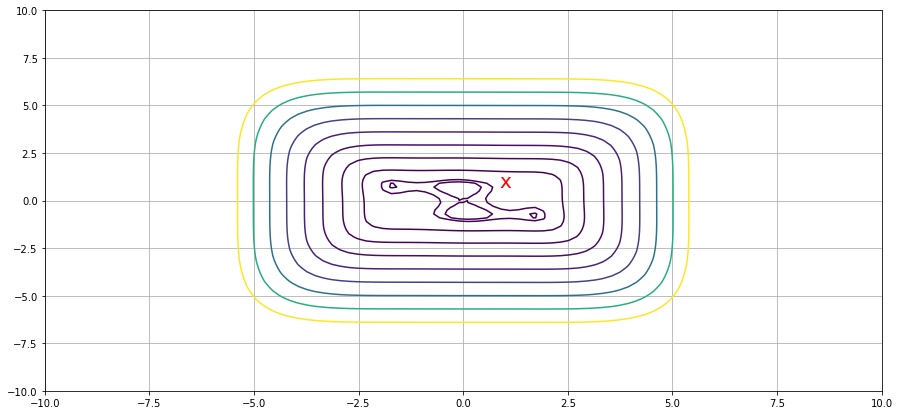

In [5]:
plt.figure(figsize=(15, 7))
plt.contour(X_s, Y_s, Z_s, np.arange(10)**4)
plt.text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20)
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


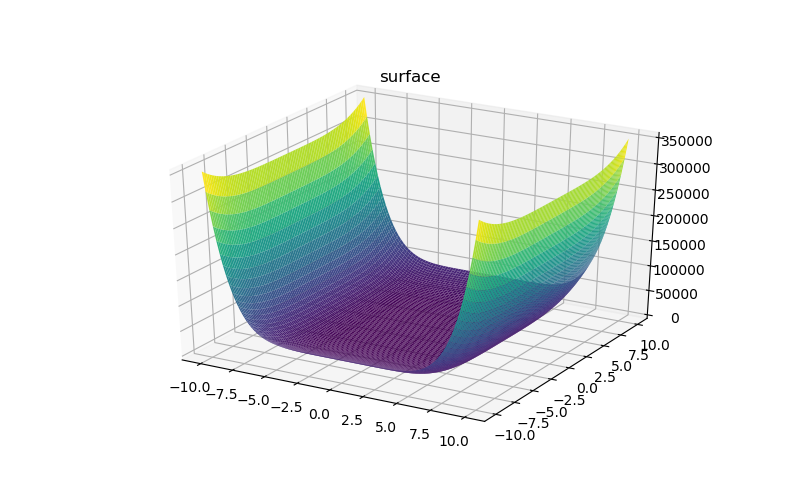

In [6]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
ax.plot_surface(X_s, Y_s, Z_s, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

In [8]:
from scipy.optimize import minimize_scalar
from scipy import optimize
from scipy.optimize import minimize

In [9]:
minimize(f, [0, 0])

      fun: 0.0
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([ 5.96046448e-08, -5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0., 0.])

In [10]:
minimize(f, [0, 0], method = 'Nelder-Mead')

 final_simplex: (array([[-0.08985145,  0.71266538],
       [-0.08980805,  0.71267176],
       [-0.08977995,  0.71263089]]), array([-1.03162845, -1.03162845, -1.03162843]))
           fun: -1.031628452567338
       message: 'Optimization terminated successfully.'
          nfev: 101
           nit: 52
        status: 0
       success: True
             x: array([-0.08985145,  0.71266538])

In [11]:
minimize(f, [0, 0], method = 'Powell')

   direc: array([[ 0.00000000e+00,  1.00000000e+00],
       [-6.21111406e-04,  4.70877838e-05]])
     fun: -1.0316284534898421
 message: 'Optimization terminated successfully.'
    nfev: 81
     nit: 3
  status: 0
 success: True
       x: array([-0.08984201,  0.71265634])

In [12]:
minimize(f, [0, 0], method = 'CG' )

     fun: 0.0
     jac: array([ 5.96046448e-08, -5.96046448e-08])
 message: 'Optimization terminated successfully.'
    nfev: 4
     nit: 0
    njev: 1
  status: 0
 success: True
       x: array([0., 0.])

In [13]:
minimize(f, [0, 0], method = 'BFGS' )

      fun: 0.0
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([ 5.96046448e-08, -5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0., 0.])

In [14]:
minimize(f, [0, 0], method = 'L-BFGS-B')    

      fun: 0.0
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 4.e-08, -4.e-08])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 3
      nit: 0
   status: 0
  success: True
        x: array([0., 0.])

In [15]:
minimize(f, [0, 0], method = 'TNC')

     fun: 0.0
     jac: array([ 4.e-08, -4.e-08])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 1
     nit: 0
  status: 0
 success: True
       x: array([0., 0.])

In [16]:
minimize(f, [0, 0], method = 'COBYLA')

     fun: -1.0316283555553818
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 41
  status: 1
 success: True
       x: array([-0.08982442,  0.71254663])

In [17]:
minimize(f, [0, 0], method = 'SLSQP')

     fun: 0.0
     jac: array([ 5.96046448e-08, -5.96046448e-08])
 message: 'Optimization terminated successfully.'
    nfev: 4
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([0., 0.])

In [18]:
from sympy import symbols, hessian, Function, Derivative, diff

x, y = symbols('x y')
f_ = symbols('f', cls=Function)

f_ = (4 - 2.1 * x ** 2 + (x ** 4) / 3) * (x ** 2) + x * y + (4 * (y ** 2) - 4) * (y **2)

In [19]:
diff(f_, x).simplify()

2.0*x**5 - 8.4*x**3 + 8.0*x + 1.0*y

In [20]:
diff(f_, y).simplify()

x + 16*y**3 - 8*y

In [21]:
hessian(f_, [x, y])

Matrix([
[2*x**4/3 + x**2*(4*x**2 - 4.2) - 4.2*x**2 + 4*x*(4*x**3/3 - 4.2*x) + 8,           1],
[                                                                     1, 48*y**2 - 8]])

In [22]:
def jac(params):
    x, y = params[0], params[1]
    d_x = 2.0*x**5 - 8.4*x**3 + 8.0*x + 1.0*y
    d_y = x + 16*y**3 - 8*y
    return np.array([d_x, d_y])

In [23]:
d_x = 2.0*x**5 - 8.4*x**3 + 8.0*x + 1.0*y
diff(d_x, x).simplify()

10.0*x**4 - 25.2*x**2 + 8.0

In [24]:
def hessian(params):
    x, y = params[0], params[1]
    d_x_x = 10.0*x**4 - 25.2*x**2 + 8.0
    d_x_y = 1
    d_y_x = 1
    d_y_y = 48.0*y**2 - 8
    
    hes_matrix = np.empty((2, 2))
    hes_matrix[0, 0] = d_x_x
    hes_matrix[0, 1] = d_x_y
    hes_matrix[1, 0] = d_y_x
    hes_matrix[1, 1] = d_y_y
    return hes_matrix

In [25]:
minimize(f, [0, 0], jac=jac, hess=hessian, method='Newton-CG', tol=1e-6)

     fun: 0.0
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 2
    nhev: 1
     nit: 1
    njev: 2
  status: 0
 success: True
       x: array([0., 0.])

In [26]:
minimize(f, [0, 0], jac=jac, hess=hessian, method='dogleg', tol=1e-6)

     fun: 0.0
    hess: array([[ 8.,  1.],
       [ 1., -8.]])
     jac: array([0., 0.])
 message: 'A linalg error occurred, such as a non-psd Hessian.'
    nfev: 1
    nhev: 1
     nit: 0
    njev: 1
  status: 3
 success: False
       x: array([0., 0.])

In [27]:
minimize(f, [0, 0], jac=jac, hess=hessian, method='trust-ncg', tol=1e-6)

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\optimize\_trustregion.py:93: RuntimeWarning: invalid value encountered in double_scalars
  ta = -aux / (2*a)
C:\Users\DELL\Anaconda3\lib\site-packages\scipy\optimize\_trustregion.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  tb = -2*c / aux
C:\Users\DELL\Anaconda3\lib\site-packages\scipy\optimize\_trustregion_ncg.py:100: RuntimeWarning: invalid value encountered in multiply
  pb = z + tb * d


     fun: 0.0
    hess: array([[ 8.,  1.],
       [ 1., -8.]])
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 2
    nhev: 1
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([0., 0.])

In [28]:
minimize(f, [0, 0], jac=jac, hess=hessian, method='trust-exact', tol=1e-6)

     fun: 0.0
    hess: array([[ 8.,  1.],
       [ 1., -8.]])
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 2
    nhev: 2
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([0., 0.])

In [29]:
minimize(f, [0, 0], jac=jac, hess=hessian, method='trust-krylov', tol=1e-6)

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\optimize\_trustregion.py:188: RuntimeWarning: invalid value encountered in true_divide
  p, hits_boundary = m.solve(trust_radius)
C:\Users\DELL\Anaconda3\lib\site-packages\scipy\optimize\_trustregion.py:188: RuntimeWarning: invalid value encountered in multiply
  p, hits_boundary = m.solve(trust_radius)


     fun: 0.0
    hess: array([[ 8.,  1.],
       [ 1., -8.]])
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 2
    nhev: 1
     nit: 1
    njev: 2
  status: 0
 success: True
       x: array([0., 0.])

In [30]:
def gradient_descent(starting_points, alpha, max_iter=50000, tol=1e-10):
    current_x, current_y = starting_points[0], starting_points[1]
    n_iter = 0
    
    states = [(current_x, current_y)]
    while True:
        function_current_value = f((current_x, current_y))
        d_x, d_y = jac((current_x, current_y))
        
        updated_x = current_x - alpha * d_x
        updated_y = current_y - alpha * d_y
         
        states.append((updated_x, updated_y))
        n_iter += 1
        
        if n_iter > max_iter:
            break
        
        function_updates_value = f((updated_x, updated_y))
        
        if abs(function_updates_value - function_current_value) < tol:
            break
            
        current_x = updated_x
        current_y = updated_y
    return states

In [31]:
points = gradient_descent([4, -4], 0.0002)

In [32]:
solution = points[-1]

solution

(1.7036403799318165, -0.7960992103857913)

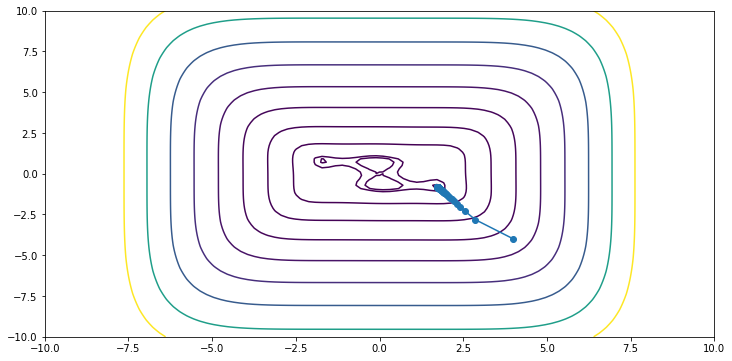

In [33]:
% matplotlib inline

points = np.array(points)
plt.figure(figsize=(12,6))
plt.contour(X_s, Y_s, Z_s, np.arange(10)**5)
plt.plot(points[:, 0][::10], points[:, 1][::10], '-o');

In [34]:
points = gradient_descent([0, -2], 0.0002)

In [35]:
solution = points[-1]

solution

(0.08975065353144304, -0.7126468341777177)

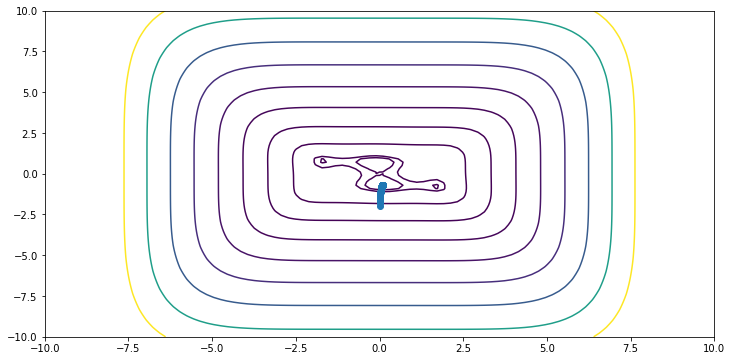

In [36]:
% matplotlib inline

points = np.array(points)
plt.figure(figsize=(12,6))
plt.contour(X_s, Y_s, Z_s, np.arange(10)**5)
plt.plot(points[:, 0][::10], points[:, 1][::10], '-o');

In [37]:
points = gradient_descent([-7, 0.5], 0.00005)

In [38]:
solution = points[-1]

solution

(-1.7036676505894959, 0.7960526856924822)

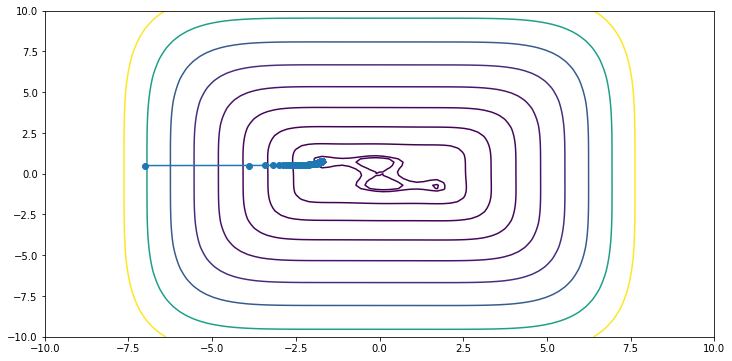

In [39]:
% matplotlib inline

points = np.array(points)
plt.figure(figsize=(12,6))
plt.contour(X_s, Y_s, Z_s, np.arange(10)**5)
plt.plot(points[:, 0][::10], points[:, 1][::10], '-o');

In [40]:
from scipy import integrate

In [41]:
def f(x, y):
    return (4 - 2.1 * x ** 2 + (x ** 4) / 3) * (x ** 2) + x * y + (4 * (y ** 2) - 4) * (y **2)

def bounds_y():
    return [0, 1]

def bounds_x(y):
    return [0, 10]
    
integrate.nquad(f, [bounds_x, bounds_y])

(435543.4761904762, 4.835837599035171e-09)

In [42]:
def bounds_y():
    return [1, 2]

def bounds_x(y):
    return [0, 2 * y - 1]
    
integrate.nquad(f, [bounds_x, bounds_y])

(49.493809523809524, 2.105439215763368e-12)

In [43]:
a = np.arange(1, 10, dtype=float).reshape(3, 3)
a

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [44]:
b = np.array([1, 2, 3])

In [45]:
np.linalg.inv(a)

array([[ 3.15251974e+15, -6.30503948e+15,  3.15251974e+15],
       [-6.30503948e+15,  1.26100790e+16, -6.30503948e+15],
       [ 3.15251974e+15, -6.30503948e+15,  3.15251974e+15]])

In [46]:
np.linalg.det(a)

-9.51619735392994e-16

In [47]:
np.linalg.norm(b)

3.7416573867739413

In [48]:
a.T

array([[1., 4., 7.],
       [2., 5., 8.],
       [3., 6., 9.]])

In [49]:
x = np.linalg.solve(a, b)
x

array([-0.23333333,  0.46666667,  0.1       ])

In [50]:
import scipy.linalg
import scipy as sc

In [51]:
values, vectors = sc.linalg.eig(a)

In [52]:
values

array([ 1.61168440e+01+0.j, -1.11684397e+00+0.j, -9.75918483e-16+0.j])

In [53]:
vectors

array([[-0.23197069, -0.78583024,  0.40824829],
       [-0.52532209, -0.08675134, -0.81649658],
       [-0.8186735 ,  0.61232756,  0.40824829]])

In [54]:
# Singular Value Decomposition - SVD
U,s,Vh = sc.linalg.svd(a)

In [55]:
U

array([[-0.21483724,  0.88723069,  0.40824829],
       [-0.52058739,  0.24964395, -0.81649658],
       [-0.82633754, -0.38794278,  0.40824829]])

In [56]:
s

array([1.68481034e+01, 1.06836951e+00, 3.33475287e-16])

In [57]:
Vh

array([[-0.47967118, -0.57236779, -0.66506441],
       [-0.77669099, -0.07568647,  0.62531805],
       [-0.40824829,  0.81649658, -0.40824829]])

In [64]:
a = np.matrix(np.arange(1, 10).reshape((3, 3)))
a

matrix([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [66]:
x.std()

2.581988897471611

In [68]:
x.min()

1

In [69]:
x.mean()

5.0

In [72]:
# Returns the (multiplicative) inverse of invertible self.
x.getI()

matrix([[ 3.15251974e+15, -6.30503948e+15,  3.15251974e+15],
        [-6.30503948e+15,  1.26100790e+16, -6.30503948e+15],
        [ 3.15251974e+15, -6.30503948e+15,  3.15251974e+15]])

In [73]:
x.argmax()

8